
 # Случайный лес

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

 ### 1. Загрузите встроенный датасет load_breast_cancer. Обозначьте признаки за X, а целевую переменную за y и выведите их размеры. Выведите данные в виде датафрейма.

In [ ]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X.shape, y.shape

((569, 30), (569,))

In [ ]:
data = pd.DataFrame(X, columns = cancer.feature_names)
data['target'] = y
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data['target'].value_counts()

,count
target,
1,357
0,212


 ### 2. Разделите данные на обучающую и тестовую части в соотношении 4:1, зафиксировав random_state=42. Выведите получившиеся размеры обучающей и тестовой выборок.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state=42)
X_train.shape[0], X_test.shape[0]

(455, 114)

 ### 3. Обучите на обучающих данных модель классификационного решающего дерева с параметрами по умолчанию, зафиксировав только random_state=42. Выведите знасение метрики accuracy на тестовых данных.

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test, y_test)

0.9473684210526315

 ### 4. Обучите на обучающих данных модель классификационного случайного леса из 30 деревьев, зафиксировав random_state=42. Выведите знасение метрики accuracy на тестовых данных. Сделайте вывод о том, какая модель лучше осуществляет классификацию для этих данных: решающее дерево или случайный лес из 30 деревьев. Выведите список базовых алгоритмов деревьев, участвующих в модели леса при помощи атрибута .estimators_.

In [ ]:
forest_clf = RandomForestClassifier(n_estimators = 30, random_state = 42)
forest_clf.fit(X_train, y_train)
forest_clf.score(X_test, y_test)

0.9649122807017544

In [ ]:
forest_clf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542),
 DecisionTreeClassifier(max_features='sqrt', random_state=1273642419),
 DecisionTreeClassifier(max_features='sqrt', random_state=1935803228),
 DecisionTreeClassifier(max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_features='sqrt', random_state=1201263687),
 DecisionTreeClassifier(max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_features='sqrt', random_state=1914837113),
 DecisionTreeClassifier(max_features='sqrt', random_state=669991378),
 DecisionTreeClassifier(max_features='sqrt', random_state=429389014),
 DecisionTreeClassifier(max_features='sqrt', random_state=249467210),
 DecisionTreeClassifier(max_features='sqrt', random_state=1972458954),
 DecisionTreeC

 ### 5. Исследуйте на переобученность построенные модели дерева решений и случайного леса с 30 деревьями. Для этого осуществите кросс-валидацию с 10 итерациями.

In [ ]:
cv_results = cross_validate(tree_clf, X_train, y_train, cv = 10,
                            scoring = 'accuracy',
                            return_train_score = True)
scores = pd.DataFrame(cv_results)[['train_score', 'test_score']]
scores

,train_score,test_score
0,1.0,0.913043
1,1.0,0.934783
2,1.0,0.978261
3,1.0,0.847826
4,1.0,0.934783
5,1.0,0.977778
6,1.0,0.911111
7,1.0,0.955556
8,1.0,0.977778
9,1.0,0.866667


In [ ]:
scores.mean(axis = 0)

,0
train_score,1.000000
test_score,0.929758


Text(0, 0.5, 'accuracy')

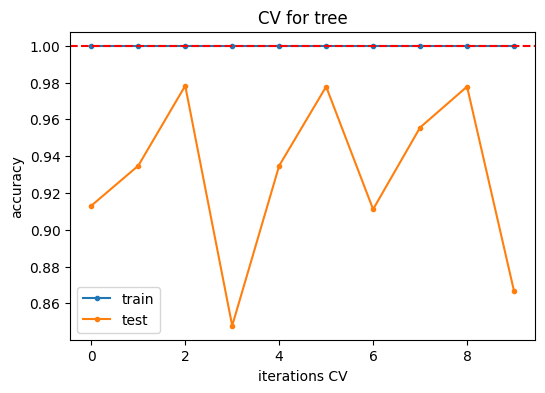

In [ ]:
plt.figure(figsize = (6, 4))
plt.plot(scores['train_score'], label = 'train', marker = '.')
plt.plot(scores['test_score'], label = 'test', marker = '.')
plt.axhline(y = 1, color = 'red', ls = 'dashed')
plt.legend()
plt.title('CV for tree')
plt.xlabel('iterations CV')
plt.ylabel('accuracy')

In [ ]:
cv_results = cross_validate(forest_clf, X_train, y_train, cv = 10,
                            scoring = 'accuracy',
                            return_train_score = True)
scores = pd.DataFrame(cv_results)[['train_score', 'test_score']]
scores

,train_score,test_score
0,0.997555,1.000000
1,0.997555,0.978261
2,0.997555,1.000000
3,1.000000,0.934783
4,0.997555,0.978261
5,0.995122,0.977778
6,0.995122,0.955556
7,0.995122,0.933333
8,0.997561,0.977778
9,1.000000,0.933333


In [ ]:
scores.mean(axis = 0)

,0
train_score,0.997315
test_score,0.966908


Text(0, 0.5, 'accuracy')

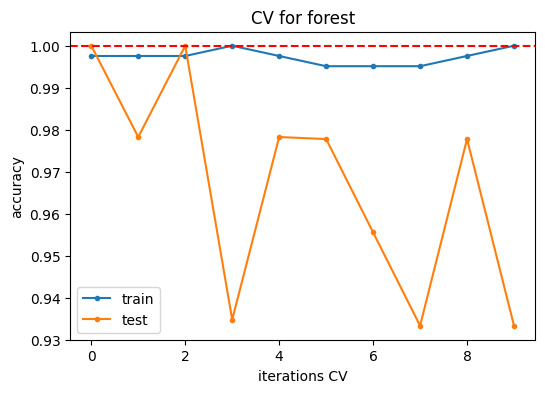

In [ ]:
plt.figure(figsize = (6, 4))
plt.plot(scores['train_score'], label = 'train', marker = '.')
plt.plot(scores['test_score'], label = 'test', marker = '.')
plt.axhline(y = 1, color = 'red', ls = 'dashed')
plt.legend()
plt.title('CV for forest')
plt.xlabel('iterations CV')
plt.ylabel('accuracy')

 ### 6. Посмотрите на поведение модели случайного леса при росте числа деревьев. Для этого постройте кривую проверки в зависимости от числа деревьев от 1 до 100. При этом количество итераций кросс-валидации возьмите равным трём.

In [ ]:
tree = np.arange(1, 101)

In [ ]:
train_scores, test_scores = validation_curve(RandomForestClassifier(random_state = 42),
                                             X_train, y_train,
                                             param_name='n_estimators',
                                             param_range = tree,
                                             scoring = 'accuracy', cv = 3,
                                             n_jobs=-1)

Text(0, 0.5, 'accuracy')

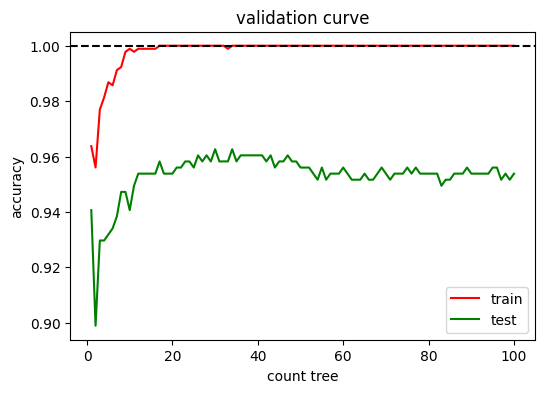

In [ ]:
plt.figure(figsize = (6, 4))
plt.plot(tree, train_scores.mean(axis = 1), label = 'train', color = 'red')
plt.plot(tree, test_scores.mean(axis = 1), label = 'test', color = 'green')
plt.axhline(y = 1, color = 'black', ls = 'dashed')
plt.legend()
plt.title('validation curve')
plt.xlabel('count tree')
plt.ylabel('accuracy')

 ### 7. Определите степени важности признаков, используя атрибут .feature_importances_. Выберите два наиболее важных признака.

In [ ]:
forest_clf.feature_importances_

array([0.06339443, 0.01782578, 0.04488739, 0.0471399 , 0.00596547,
       0.02368214, 0.08825431, 0.14034634, 0.00417946, 0.00460026,
       0.0387992 , 0.00480886, 0.00841159, 0.05123942, 0.00352245,
       0.0035935 , 0.00897903, 0.00597533, 0.00460855, 0.00611368,
       0.04932543, 0.01834412, 0.05172104, 0.10617421, 0.0080019 ,
       0.02568527, 0.01566631, 0.13561429, 0.00625461, 0.00688574])

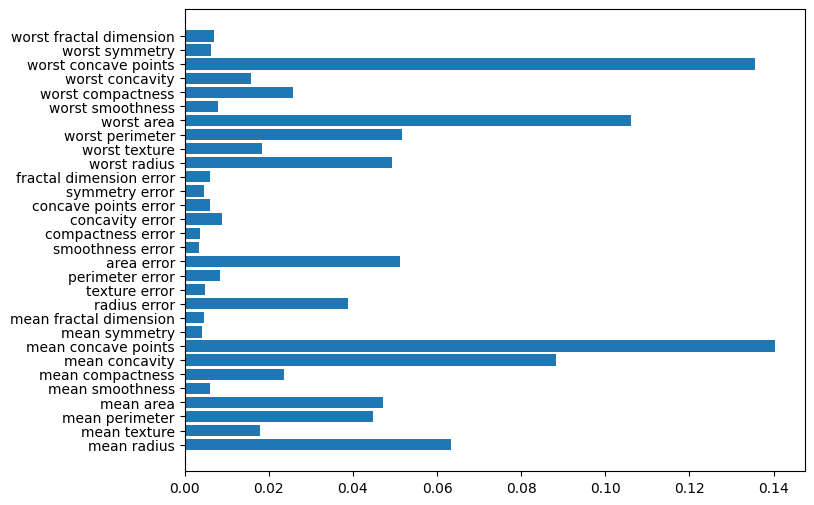

In [ ]:
plt.figure(figsize = (8, 6))
plt.barh(data.columns[:-1], forest_clf.feature_importances_)
plt.show()

In [ ]:
np.sort(forest_clf.feature_importances_)

array([0.00352245, 0.0035935 , 0.00417946, 0.00460026, 0.00460855,
       0.00480886, 0.00596547, 0.00597533, 0.00611368, 0.00625461,
       0.00688574, 0.0080019 , 0.00841159, 0.00897903, 0.01566631,
       0.01782578, 0.01834412, 0.02368214, 0.02568527, 0.0387992 ,
       0.04488739, 0.0471399 , 0.04932543, 0.05123942, 0.05172104,
       0.06339443, 0.08825431, 0.10617421, 0.13561429, 0.14034634])

In [ ]:
forest_clf.feature_importances_.argsort()[::-1]

array([ 7, 27, 23,  6,  0, 22, 13, 20,  3,  2, 10, 25,  5, 21,  1, 26, 16,
       12, 24, 29, 28, 19, 17,  4, 11, 18,  9,  8, 15, 14])

In [ ]:
for i in forest_clf.feature_importances_.argsort()[::-1]:
  print(f'{data.columns[:-1][i]:<25}'
        f'{forest_clf.feature_importances_.argsort()[i]:.3f}')

mean concave points      17.000
worst concave points     23.000
worst area               13.000
mean concavity           4.000
mean radius              14.000
worst perimeter          20.000
area error               16.000
worst radius             2.000
mean area                9.000
mean perimeter           8.000
radius error             29.000
worst compactness        0.000
mean compactness         11.000
worst texture            3.000
mean texture             15.000
worst concavity          6.000
concavity error          21.000
perimeter error          12.000
worst smoothness         22.000
worst fractal dimension  7.000
worst symmetry           27.000
fractal dimension error  10.000
concave points error     5.000
mean smoothness          18.000
texture error            24.000
symmetry error           25.000
mean fractal dimension   28.000
mean symmetry            19.000
compactness error        1.000
smoothness error         26.000


In [ ]:
indexes = forest_clf.feature_importances_.argsort()[-2:]
indexes

array([27,  7])

 ### 8. Используя только два наиболее важных признака, разбейте данные на обучающую и тестовую части. Обучите на обучающих данных модель классификационного случайного леса из 30 деревьев, зафиксировав random_state=42. Выведите знасение метрики accuracy на тестовых данных. Визуализируйте области разделения на классы для тестовых данных и диаграмму рассеивания тестовых данных на одном графике.

In [ ]:
X2 = X[:, indexes]
X2

array([[0.2654 , 0.1471 ],
       [0.186  , 0.07017],
       [0.243  , 0.1279 ],
       ...,
       [0.1418 , 0.05302],
       [0.265  , 0.152  ],
       [0.     , 0.     ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y,
                                                    test_size = 0.2, random_state=42)
X_train.shape[0], X_test.shape[0]

(455, 114)

In [ ]:
forest_clf2 = RandomForestClassifier(n_estimators = 30, random_state = 42)
forest_clf2.fit(X_train, y_train)
forest_clf2.score(X_test, y_test)

0.8859649122807017

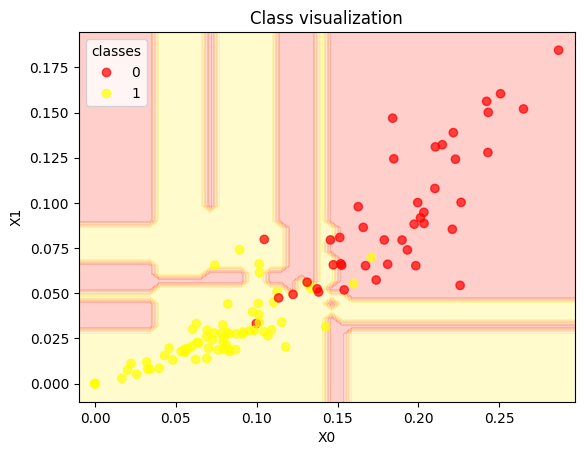

In [ ]:
X0 = np.linspace(X_test[:, 0].min() - 0.01, X_test[:, 0].max() + 0.01)
X1 = np.linspace(X_test[:, 1].min() - 0.01, X_test[:, 1].max() + 0.01)
X0_grid, X1_grid = np.meshgrid(X0, X1)
Z_grid = forest_clf2.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)
plt.contourf(X0_grid, X1_grid, Z_grid, cmap = 'autumn', alpha = 0.2)
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = 'autumn', alpha = 0.7)
plt.legend(*scatter.legend_elements(), title = 'classes')
plt.title('Class visualization')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

 ### 1. Загрузите данные об уровне заработной платы multiple_linear_regression_dataset.csv. Обозначьте признаки за X, а целевую переменную income за y и выведите их размеры. Выведите данные в виде датафрейма.

In [ ]:
data = pd.read_csv('multiple_linear_regression_dataset.csv')
X.shape, y.shape

((569, 30), (569,))

In [ ]:
data.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [ ]:
X = data.drop('income', axis=1)
y = data['income']

 ### 2. Разделите данные на обучающую и тестовую части в соотношении 4:1, зафиксировав random_state=42. Выведите получившиеся размеры обучающей и тестовой выборок.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state=42)
X_train.shape[0], X_test.shape[0]

(16, 4)

 ### 3. Обучите на обучающих данных модель регрессионного решающего дерева с параметрами по умолчанию, зафиксировав только random_state=42. Выведите значение метрики RMSE на тестовых данных.

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
rmse

np.float64(54.20968718244832)

 ### 4. Обучите на обучающих данных модель регрессионного случайного леса из 80 деревьев, зафиксировав random_state=42. Выведите значение метрики RMSE на тестовых данных. Сделайте вывод о том, какая модель лучше осуществляет регрессию для этих данных: решающее дерево или случайный лес из 80 деревьев. Выведите список базовых алгоритмов деревьев, участвующих в модели леса при помощи атрибута .estimators_.

In [ ]:
forest_reg = RandomForestRegressor(n_estimators = 80, random_state = 42)
forest_reg.fit(X_train, y_train)
forest_reg.score(X_test, y_test)

0.7242954712749344

In [ ]:
forest_reg.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=1608637542),
 DecisionTreeRegressor(max_features=1.0, random_state=1273642419),
 DecisionTreeRegressor(max_features=1.0, random_state=1935803228),
 DecisionTreeRegressor(max_features=1.0, random_state=787846414),
 DecisionTreeRegressor(max_features=1.0, random_state=996406378),
 DecisionTreeRegressor(max_features=1.0, random_state=1201263687),
 DecisionTreeRegressor(max_features=1.0, random_state=423734972),
 DecisionTreeRegressor(max_features=1.0, random_state=415968276),
 DecisionTreeRegressor(max_features=1.0, random_state=670094950),
 DecisionTreeRegressor(max_features=1.0, random_state=1914837113),
 DecisionTreeRegressor(max_features=1.0, random_state=669991378),
 DecisionTreeRegressor(max_features=1.0, random_state=429389014),
 DecisionTreeRegressor(max_features=1.0, random_state=249467210),
 DecisionTreeRegressor(max_features=1.0, random_state=1972458954),
 DecisionTreeRegressor(max_features=1.0, random_state=1572714583),
 De

 ### 5. Исследуйте на переобученность построенные модели дерева решений и случайного леса с 80 деревьями. Для этого осуществите кросс-валидацию с 5 итерациями.

In [ ]:
cv_results = cross_validate(tree_reg, X_train, y_train, cv = 5,
                            scoring = 'neg_mean_squared_error',
                            return_train_score = True)
scores = -(pd.DataFrame(cv_results)[['train_score', 'test_score']])
scores

,train_score,test_score
0,0.0,7.246800e+06
1,0.0,5.436630e+07
2,0.0,5.222033e+06
3,0.0,1.668757e+07
4,0.0,3.658037e+07


In [ ]:
scores.mean(axis = 0)

,0
train_score,0.000000e+00
test_score,2.402061e+07


Text(0, 0.5, 'neg_mean_squared_error')

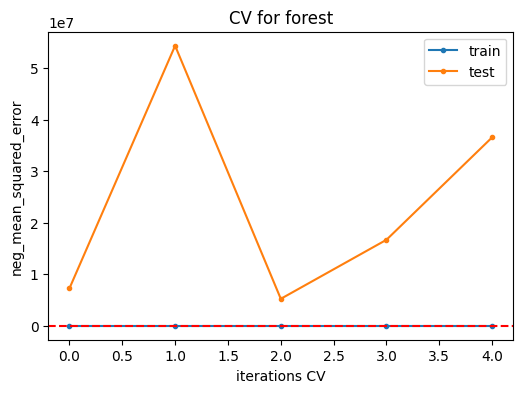

In [ ]:
plt.figure(figsize = (6, 4))
plt.plot(scores['train_score'], label = 'train', marker = '.')
plt.plot(scores['test_score'], label = 'test', marker = '.')
plt.axhline(y = 1, color = 'red', ls = 'dashed')
plt.legend()
plt.title('CV for forest')
plt.xlabel('iterations CV')
plt.ylabel('neg_mean_squared_error')

In [ ]:
cv_results = cross_validate(tree_reg, X_train, y_train, cv = 5,
                            scoring = 'neg_mean_squared_error',
                            return_train_score = True)
scores = -(pd.DataFrame(cv_results)[['train_score', 'test_score']])
scores

,train_score,test_score
0,0.0,7.246800e+06
1,0.0,5.436630e+07
2,0.0,5.222033e+06
3,0.0,1.668757e+07
4,0.0,3.658037e+07


In [ ]:
scores.mean(axis = 0)

,0
train_score,0.000000e+00
test_score,2.402061e+07


Text(0, 0.5, 'accuracy')

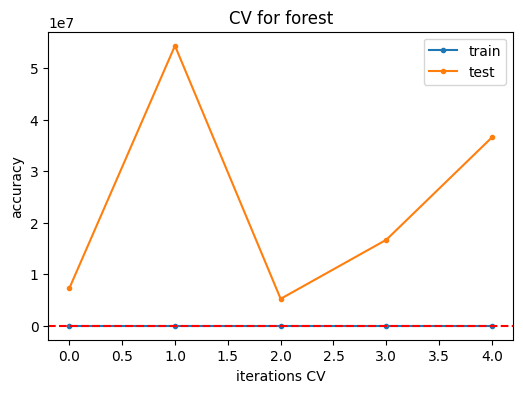

In [ ]:
plt.figure(figsize = (6, 4))
plt.plot(scores['train_score'], label = 'train', marker = '.')
plt.plot(scores['test_score'], label = 'test', marker = '.')
plt.axhline(y = 1, color = 'red', ls = 'dashed')
plt.legend()
plt.title('CV for forest')
plt.xlabel('iterations CV')
plt.ylabel('accuracy')

 ### 6. Посмотрите на поведение модели случайного леса при росте числа деревьев. Для этого постройте кривую проверки в зависимости от числа деревьев от 1 до 100. При этом количество итераций кросс-валидации возьмите равным трём.

In [ ]:
tree = np.arange(1, 101)

In [ ]:
train_scores, test_scores = validation_curve(RandomForestRegressor(random_state = 42),
                                             X_train, y_train,
                                             param_name='n_estimators',
                                             param_range = tree,
                                             scoring = 'neg_mean_squared_error', cv = 3,
                                             n_jobs=-1)

Text(0, 0.5, 'accuracy')

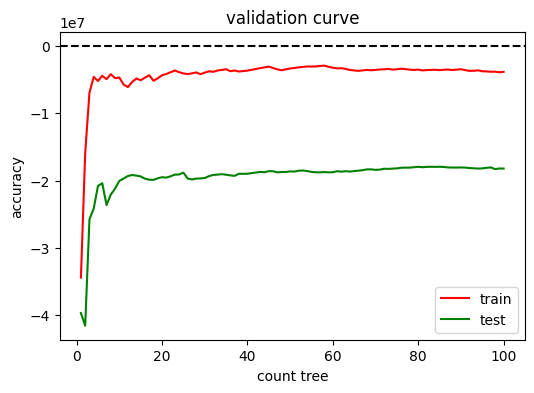

In [ ]:
plt.figure(figsize = (6, 4))
plt.plot(tree, train_scores.mean(axis = 1), label = 'train', color = 'red')
plt.plot(tree, test_scores.mean(axis = 1), label = 'test', color = 'green')
plt.axhline(y = 1, color = 'black', ls = 'dashed')
plt.legend()
plt.title('validation curve')
plt.xlabel('count tree')
plt.ylabel('accuracy')

 ### 7. Определите степени важности признаков, используя атрибут .feature_importances_. Выберите самый важный признак.

In [ ]:
forest_reg.feature_importances_

array([0.17522525, 0.82477475])

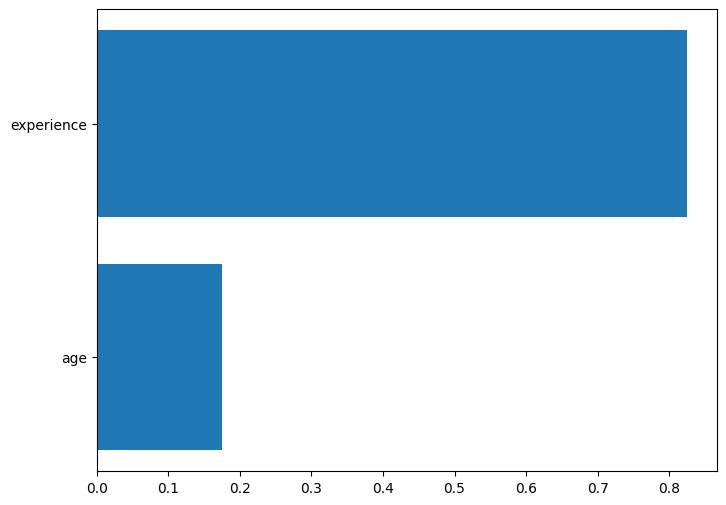

In [ ]:
plt.figure(figsize = (8, 6))
plt.barh(data.columns[:-1], forest_reg.feature_importances_)
plt.show()

In [ ]:
sorted_importance_indices = forest_reg.feature_importances_.argsort()[::-1]

In [ ]:
forest_reg.feature_importances_.argsort()[::-1]

array([1, 0])

In [ ]:
for i in sorted_importance_indices:
    print(f"{X.columns[i]:<25} {forest_reg.feature_importances_[i]:.3f}")

experience                0.825
age                       0.175


In [ ]:
most_important_index = sorted_importance_indices[0]
print(f"\nСамый важный признак: {X.columns[most_important_index]} (индекс {most_important_index})")


Самый важный признак: experience (индекс 1)


In [ ]:
indexes = [most_important_index]
indexes

[np.int64(1)]